# Instructions Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

**Scenario**

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

**Instructions**

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

# Import Libraries

In [196]:
#Import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks



# Data Cleaning 

In [197]:
#Import data
churndata = pd.read_csv('files_for_lab/Customer-Churn.csv')#, header=None)
churndata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [198]:
#check data types in columns
dataTypeSeries = churndata.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [199]:
#Rename Column Headers to avoid errors 
churndata.columns = [column.lower().replace(' ','_') for column in churndata.columns]
churndata.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [200]:
#Convert total charges to numerical
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'])

ValueError: Unable to parse string " " at position 488

In [201]:
#Check error at position 488
churndata['totalcharges'][488]
#cannot convert ' ' to number

' '

In [202]:
#fill rows with spaces with null to be able to convert to column to number
for churndata.rows in churndata['totalcharges']:
        churndata['totalcharges'] = churndata['totalcharges'].str.replace(' ','0')

In [203]:
#Check again at position 488
churndata['totalcharges'][488]

'0'

In [204]:
churndata.loc[churndata.totalcharges == '0'].count()

gender              11
seniorcitizen       11
partner             11
dependents          11
tenure              11
phoneservice        11
onlinesecurity      11
onlinebackup        11
deviceprotection    11
techsupport         11
streamingtv         11
streamingmovies     11
contract            11
monthlycharges      11
totalcharges        11
churn               11
dtype: int64

In [205]:
#try to resume where we left off before:
#Convert total charges to numerical
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'])

#Worked!!

In [206]:
#Check for null values in df 
churndata.isna().sum()
#No null values

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [207]:
#try to avoid error following in scaling data. fill rows with spaces/previous '0' with mean 
churndata['totalcharges'] = churndata['totalcharges'].fillna(churndata['totalcharges'].mean())

In [208]:
churndata.loc[churndata.totalcharges == '0'].count()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

# Prepare Data for Model

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic regression model on the training data.
Check the accuracy on the test data.

In [209]:
#columns for new df churndata_new
X = churndata[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = churndata['churn']

In [210]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)


In [211]:
#Scale features with standarscaler
transformer = StandardScaler()

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [212]:
#convert to df
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Run Logistic Regression Model without correcting Data Imbalance

In [213]:
def classification_model(X_train, y_train, X_test, y_test, w):
    classification = LogisticRegression(random_state=12, max_iter=100, class_weight=w) 
    classification.fit(X_train, y_train)
    
    score_class = classification.score(X_test, y_test)
    
    predictions = classification.predict(X_test)
    value_cnt_class = pd.Series(predictions).value_counts()
    
    print('The accuracyscore is: ', score_class, '\n')
    print('Value counts of the model predictions: ', '\n', value_cnt_class)

In [214]:
def metrics_classification(X_train, y_train, X_test, y_test, w):
    
    classification = LogisticRegression(random_state=42, max_iter=500, class_weight=w) 
    classification.fit(X_train, y_train)
    
    predictions = classification.predict(X_test)
    
    #confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A',
                   'False B', 'True B']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    
    #classification report
    metrics_class = metrics.classification_report(y_test, predictions)
    print('Classification report:', '\n')
    print(metrics_class)
    
    
    print('Confusion matrix:')
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [215]:
classification_model(X_train, y_train, X_test, y_test, w=None)

The accuracyscore is:  0.8076650106458482 

Value counts of the model predictions:  
 No     1143
Yes     266
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1058
         Yes       0.65      0.49      0.56       351

    accuracy                           0.81      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409

Confusion matrix:


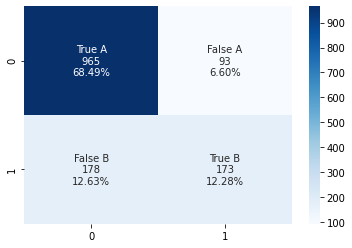

In [216]:
metrics_classification(X_train, y_train, X_test, y_test, w=None)

# Deal with imbalance

In [217]:
#check imbalance in target column
churndata['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

-> huge imbalance.

## Downsampling

In downsampling, we randomly sample without replacement from the majority class

In [218]:
#check y_train
y_train.head()

5658     No
783     Yes
1836    Yes
545      No
3609     No
Name: churn, dtype: object

In [219]:
y_train = pd.DataFrame(y_train).reset_index()
y_train = y_train.drop('index', axis=1)
y_train

,churn
0,No
1,Yes
2,Yes
3,No
4,No
...,...
5629,No
5630,No
5631,Yes
5632,No


In [220]:
#concat training data
data_downs = pd.concat([X_train, y_train], axis=1)
data_downs

,0,1,2,3,churn
0,-0.334388,-0.432556,0.929907,-0.016113,No
1,-1.271005,-0.432556,-0.425956,-0.980816,Yes
2,-0.334388,-0.432556,1.029603,-0.071293,Yes
3,0.072836,-0.432556,0.462999,0.159246,No
4,1.172343,-0.432556,1.293797,1.818069,No
...,...,...,...,...,...
5629,-0.090053,-0.432556,-0.502389,-0.370257,No
5630,1.416677,2.311838,1.697565,2.440534,No
5631,-1.271005,-0.432556,-0.979267,-0.988131,Yes
5632,-0.782335,-0.432556,-1.346480,-0.852795,No


In [221]:
A = data_downs[data_downs['churn'] == 'Yes'] 
B = data_downs[data_downs['churn'] == 'No']
print(A.shape)
print(B.shape)

(1518, 5)
(4116, 5)


In [222]:
B = B.sample(len(A))

In [223]:
churn_downsampled = pd.concat([A, B], axis=0)
#shuffling the data
churn_downsampled = churn_downsampled.sample(frac=1)
churn_downsampled['churn'].value_counts()

No     1518
Yes    1518
Name: churn, dtype: int64

In [224]:
#split x,y again
X_train_downs = churn_downsampled.drop(['churn'], axis=1)
y_train_downs = churn_downsampled['churn']

In [225]:
#run model
classification_model(X_train_downs, y_train_downs, X_test, y_test, w=None)

The accuracyscore is:  0.7423704755145494 

Value counts of the model predictions:  
 No     851
Yes    558
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1058
         Yes       0.49      0.78      0.60       351

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409

Confusion matrix:


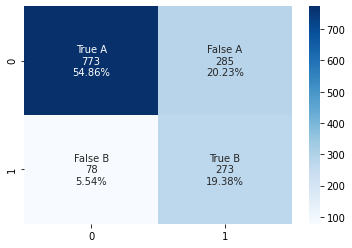

In [226]:
metrics_classification(X_train_downs, y_train_downs, X_test, y_test, w=None)

##### Other option would be: Downsampling to specific amount of rows/samples

In [228]:
#downsample to specific amount of rows/samples
A1 = data_downs[data_downs['churn'] == 'Yes'].sample(300) 
B1 = data_downs[data_downs['churn'] == 'No'].sample(300, replace=True)


churn_downsampled1 = pd.concat([A1, B1]).sample(frac=1) # .sample(frac=1)
churn_downsampled1.shape

(600, 5)

## Upsampling Method 1

In [229]:
data_ups = pd.concat([X_train, y_train], axis=1)
data_ups

,0,1,2,3,churn
0,-0.334388,-0.432556,0.929907,-0.016113,No
1,-1.271005,-0.432556,-0.425956,-0.980816,Yes
2,-0.334388,-0.432556,1.029603,-0.071293,Yes
3,0.072836,-0.432556,0.462999,0.159246,No
4,1.172343,-0.432556,1.293797,1.818069,No
...,...,...,...,...,...
5629,-0.090053,-0.432556,-0.502389,-0.370257,No
5630,1.416677,2.311838,1.697565,2.440534,No
5631,-1.271005,-0.432556,-0.979267,-0.988131,Yes
5632,-0.782335,-0.432556,-1.346480,-0.852795,No


In [230]:
C = data_ups[data_ups['churn'] == 'Yes']
D = data_ups[data_ups['churn'] == 'No']

In [231]:
print(C.shape)
print(D.shape)

(1518, 5)
(4116, 5)


In [232]:
C = C.sample(len(D), replace=True)

In [233]:
churn_upsampled = pd.concat([C, D]).sample(frac=1) #concat and shuffle the data
churn_upsampled.shape

(8232, 5)

In [234]:
churn_upsampled['churn'].value_counts()

No     4116
Yes    4116
Name: churn, dtype: int64

In [235]:
X_train_ups = churn_upsampled.drop(['churn'], axis=1)
y_train_ups = churn_upsampled['churn']

In [236]:
classification_model(X_train_ups, y_train_ups, X_test, y_test, w=None)

The accuracyscore is:  0.7416607523066004 

Value counts of the model predictions:  
 No     858
Yes    551
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.90      0.73      0.81      1058
         Yes       0.49      0.77      0.60       351

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.74      0.76      1409

Confusion matrix:


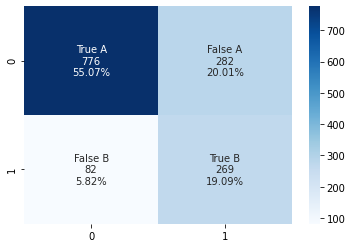

In [237]:
metrics_classification(X_train_ups, y_train_ups, X_test, y_test, w=None)

## Upsampling with SMOTE

In [238]:
X_train_smote = X_train.copy()
y_train_smote = y_train.copy()

In [239]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)
y_train_smote.value_counts()

churn
No       4116
Yes      4116
dtype: int64

In [240]:
classification_model(X_train_smote, y_train_smote, X_test, y_test, w=None)

The accuracyscore is:  0.7416607523066004 

Value counts of the model predictions:  
 No     864
Yes    545
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1058
         Yes       0.49      0.76      0.59       351

    accuracy                           0.74      1409
   macro avg       0.69      0.75      0.70      1409
weighted avg       0.80      0.74      0.76      1409

Confusion matrix:


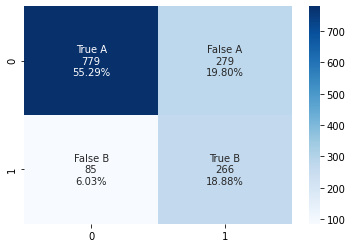

In [241]:
metrics_classification(X_train_smote, y_train_smote, X_test, y_test, w=None)


## Tomeklinks

In [242]:
X_train_tkl = X_train.copy()
y_train_tkl = y_train.copy()

In [243]:
tkl = TomekLinks('majority')

X_train_tkl, y_train_tkl = tkl.fit_resample(X_train_tkl, y_train_tkl)

In [244]:
classification_model(X_train_tkl, y_train_tkl, X_test, y_test, w=None)

The accuracyscore is:  0.7920511000709723 

Value counts of the model predictions:  
 No     1075
Yes     334
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.86      0.87      0.86      1058
         Yes       0.59      0.56      0.57       351

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Confusion matrix:


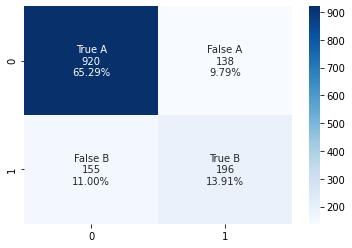

In [245]:
metrics_classification(X_train_tkl, y_train_tkl, X_test, y_test, w=None)